Course Name: Pattern Recognition Lab <br>
Course No : CSE 4214 <br>
Experiment Name: Implementing Minimum Error Rate Classifier <br>
Name: Md. Reasad Zaman Chowdhury <br>
Section: A1 <br>
Student ID: 160104004 <br>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.model_selection import train_test_split

In [5]:
from google.colab import files
uploaded = files.upload()

Saving Data_csv.csv to Data_csv.csv


In [6]:
#load dataset
df = pd.read_csv('Data_csv.csv')

#separating feature and target
X = df.iloc[:, :2].values
y = df.iloc[:, 2].values

print(df.head())

   Feature1  Feature2  Class
0    1.7044    3.6651      1
1    1.6726    4.6705      1
2    1.4597    4.1940      1
3    1.9761    4.1965      1
4    2.1897    3.1463      1


### Task 1 : Split the given data into train set and test set in a 60:40 ratio.

In [7]:
#spliting train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 21, stratify = y)

print("train size: ",len(X_train))
print("test size: ",len(y_test))

train size:  60
test size:  40


### Task 2 : Calculate Mean, Co-variance and Probability of each class from the training set.

In [8]:
#seperating each class from training set
X_train_1 = X_train[y_train == 1]
X_train_2 = X_train[y_train == 2]

#calculating mean and co-variance of each class
mean_1 =  np.mean(X_train_1, axis=0)
mean_2 = np.mean(X_train_2, axis=0)

cov_1 = np.cov(X_train_1.T)
cov_2 = np.cov(X_train_2.T)

#calculating class probability
p_class1 = len(X_train_1) / len(X_train)
p_class2 = len(X_train_2) / len(X_train) 

print('mean of class 1: ', mean_1)
print('mean of class 2: ', mean_2)
print('covariance matrix of class 1: ', cov_1)
print('covariance matrix of class 2: ', cov_2)
print('probability of class 1: ', p_class1)
print('probability of class 2: ', p_class2)

mean of class 1:  [1.97711    4.18500667]
mean of class 2:  [ 7.78244667 10.07921667]
covariance matrix of class 1:  [[ 0.29538038 -0.03231379]
 [-0.03231379  0.21652655]]
covariance matrix of class 2:  [[0.21728019 0.0170736 ]
 [0.0170736  0.20249322]]
probability of class 1:  0.5
probability of class 2:  0.5


### Task 3 : Classify the sample points from the test set using Gaussian distribution. Also, calculate the accuracy of the model

In [9]:
#function for claculating normal distribution

def normal_density(x, mean, cov):
  dim = len(x)
  exponent = math.exp( -0.5 * np.dot( np.dot(np.transpose(x - mean), np.linalg.inv(cov)), (x-mean)) )
  
  return (1 / math.sqrt( ((2 * math.pi) ** dim) * np.linalg.det(cov) )) * exponent

In [10]:
#classify the test samples 
y_pred = []

for x in X_test:
  likelihood_1 = normal_density(x, mean_1, cov_1)
  likelihood_2 = normal_density(x, mean_2, cov_2)
  
  if (likelihood_1 * p_class1 > likelihood_2 * p_class2):
    y_pred.append(1)
  else:
    y_pred.append(2)

y_pred = np.array(y_pred)

In [11]:
#calculate the accuracy

accuracy = len(y_pred == y_test) / len(y_test) 
print('Accuracy: ', accuracy)

Accuracy:  1.0


### Task 4 : Plot the classified samples with different colored markers according to the assigned class label

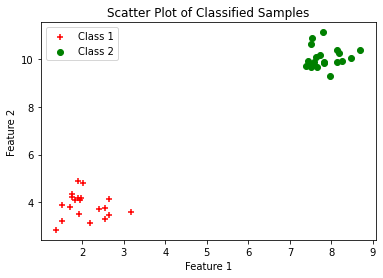

In [12]:
#scatter plot according to the class label
fig, ax = plt.subplots()

class_1 = X_test[ y_pred == 1]
class_2 = X_test[ y_pred == 2]

ax.scatter(class_1[:,0], class_1[:,1], color='red', label='Class 1', marker='+')
ax.scatter(class_2[:,0], class_2[:,1], color='green', label='Class 2')
ax.legend(loc='upper left')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Classified Samples')
plt.show()